## Bank Churn

### _- Ankur Patel_

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/866/1*X-oZNRw5Pnef-kR9CgLx1g.png", width=600, height=200)

### Introduction:

The bank has been seen unusual churn rates for their customers (churn is when people leave the company). They want to understand the problem. Therefore, they hired you, as a data scientist, to look into their data set and give them insights / solutions. Six months ago the bank took a sample of their customers and measured some characteristics about their customers, such as credit score, geography, gender, age, tenure (how many years a customer is with the bank), balance, number of products a customer had with the bank, if he had a credit card, if he is an active member, estimated salary (the bank has estimated the salary based of the data they had), exited (if a customer has left the bank or not within the last six months). I will create a classification model to tell the bank which of the customers are at the highest risk of leaving.

Dataset variables:
- credit score
- geography
- gender
- age
- tenure (how many years a customer is with the bank)
- balance
- number of products a customer had with the bank
- if he/she had a credit card
- if he/she is an active member
- estimated salary (the bank has estimated the salary based of the data they had)
- exited (if a customer has left the bank or not within the last six months)

I will be using Artificial Neural Networks ANN and Keras library that wraps Tensorflow and Theano libraries. Keras library lets you build deep learning models in a few lines of code. Keras was developed by François Chollet a machine learning scientist at Google. First, I have to install all three libraries.

#### Theano
- numerical computation library, very efficient for fast numerical computations based on Numpy syntax
- GPU is much more powerful than CPU, as there are many more cores and run more floating points calculations per second
- GPU is much more specialized for highly intensive computing tasks and parallel computations, exactly for the case for neural networks
- When we're forward propogating the activations of the different neurons in the neural network thanks to the activation function well that involves parallel computations
- When errors are backpropagated to the neural networks that again involves parallel computation
- GPU is a much better choice for deep neural network than CPU - simple neural networks, CPU is sufficient
- Created by Machine Learning group at the Univeristy of Montreal

#### Tensorflow
- Another numerical computation library that runs very fast computations that can run on your CPU or GPU
- Google Brain, Apache 2.0 license
- Theano & Tensorflow are used primarily for research and development in the deep learning field
- Deep Learning neural network from scratch, use the above
- Great for inventing new deep learning neural networks, deep learning models, lots of line of code

#### Keras
- Wrapper for Theano + Tensorflow
- Amazing library to build deep neural networks in a few lines of code
- Very powerful deep neural networks in few lines of code
- based on Theano and Tensorflow
- Sci-kit Learn (Machine Learning models), Keras (Deep Learning models)


##### Installing Theano, Tensorflow in three steps with Anaconda installed:
- $ pip install theano  

- $ pip install tensorflow      

- $ pip install keras      

- $ conda update --all  

### EDA 
### Data Preprocessing

In [22]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset
df = pd.read_csv("Bank_Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# descriptive stats of numeric values
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# although the count was 10000 and the dataset size is 10000x14 meaning no nulls, always good to double check
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# defining features and target
# RowNumber, CustomerID, Surnameare excluded  
X = df.iloc[:, 3:13].values  
y = df.iloc[:, 13].values 

In [42]:
print("First two rows:\n\nFeatures:\n",X[:2])
print("\nTarget:\n",y[:2])

First two rows:

Features:
 [[0.0000000e+00 0.0000000e+00 2.2800000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [1.0000000e+00 0.0000000e+00 2.1700000e+02 0.0000000e+00 4.1000000e+01
  1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1254258e+05]]

Target:
 [1 0]


No handles with labels found to put in legend.


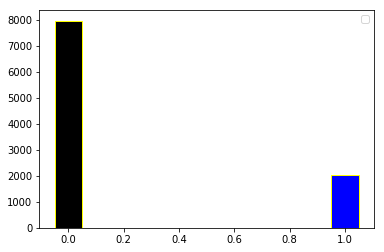

In [75]:
# distribution of Excited
labels = [0,1]
plt.bar(labels[0],df[df['Exited'] == 0]['Exited'].count(), width=0.1,color = 'black',edgecolor='yellow')
plt.bar(labels[1],df[df['Exited'] == 1]['Exited'].count(),width=0.1,color = 'blue',edgecolor='yellow')
plt.legend()

In [23]:
# encoding categorical data
# create dummy variables for categorical variables of Geography and Gender
labelencoder_X_1, labelencoder_X_2 = LabelEncoder(), LabelEncoder()
X[:, 1], X[:, 2] = labelencoder_X_1.fit_transform(X[:, 1]), labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [25]:
# splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# feature scaling
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

### Review (1):

- Dataset size: 10000 x 14
- No null values
- _minimum estimated salary: 11.58 outlier_
- Encoded the categorical variables of Geography and Gender using dummy variables
- Split into train and test 80-20% set
- Scaled features with MinMaxScaler()

### Artificial Neural Network Clustering:

#### _Model-1:_

The first ANN model is with one hidden layer and having 6 nodes (Half of feature and target variables) with activation function of the hidden and the input layer as 'relu' (rectified linear units) and the output layer 'sigmoid' as we need binary result for our classification model. Then we compile the model with SGD 'adam' as its the best which can be used in this case.

- https://github.com/keras-team/keras/blob/master/keras/activations.py
- For output layer using sigmoid activation function, since we're interested in probabilities of a customer to leave the bank


In [138]:
# sequential module - initialize neural network
# initialising the ANN
classifier = Sequential()

In [139]:
# Dense - layers of ANN
# input_dim is necessary for the first layer as it was just initialized
classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim = 11))  #input layer 
classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))  #hidden layer 1
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))  #output layer 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  #compiling result with SGD as adam
# compiled the ANN - applied Stochastic Gradient Descent to whole ANN

You could even use different activation functions for different neurons in the same layer. Different activation functions allow for different non-linearities which might work better for solving a specific function.

In [130]:
# fitting the Neural network model on the testing data 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
8000/8000 [==============================] - 22s 3ms/step - loss: 0.5163 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 6s 758us/step - loss: 0.4684 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 6s 762us/step - loss: 0.4538 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 6s 762us/step - loss: 0.4443 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 6s 772us/step - loss: 0.4369 - acc: 0.7966
Epoch 6/100
8000/8000 [==============================] - 8s 969us/step - loss: 0.4308 - acc: 0.8110
Epoch 7/100
8000/8000 [==============================] - 7s 818us/step - loss: 0.4277 - acc: 0.8176
Epoch 8/100
8000/8000 [==============================] - 7s 923us/step - loss: 0.4249 - acc: 0.8161
Epoch 9/100
8000/8000 [==============================] - 7s 869us/step - loss: 0.4232 - acc: 0.8224
Epoch 10/100
8000/8000 [==============================] - 7s 902us/step - loss: 0.4218 - acc: 0.8232


8000/8000 [==============================] - 7s 872us/step - loss: 0.3985 - acc: 0.8331
Epoch 83/100
8000/8000 [==============================] - 8s 1ms/step - loss: 0.3987 - acc: 0.8354
Epoch 84/100
8000/8000 [==============================] - 8s 978us/step - loss: 0.3986 - acc: 0.8349
Epoch 85/100
8000/8000 [==============================] - 8s 1ms/step - loss: 0.3985 - acc: 0.8352
Epoch 86/100
8000/8000 [==============================] - 5s 673us/step - loss: 0.3993 - acc: 0.8332
Epoch 87/100
8000/8000 [==============================] - 5s 622us/step - loss: 0.3987 - acc: 0.8357
Epoch 88/100
8000/8000 [==============================] - 6s 763us/step - loss: 0.3983 - acc: 0.8344
Epoch 89/100
8000/8000 [==============================] - 7s 878us/step - loss: 0.3999 - acc: 0.8340
Epoch 90/100
8000/8000 [==============================] - 7s 913us/step - loss: 0.3985 - acc: 0.8361
Epoch 91/100
8000/8000 [==============================] - 7s 902us/step - loss: 0.3987 - acc: 0.8336
Epoch 9

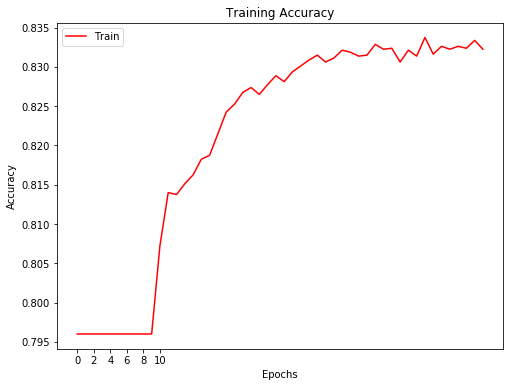

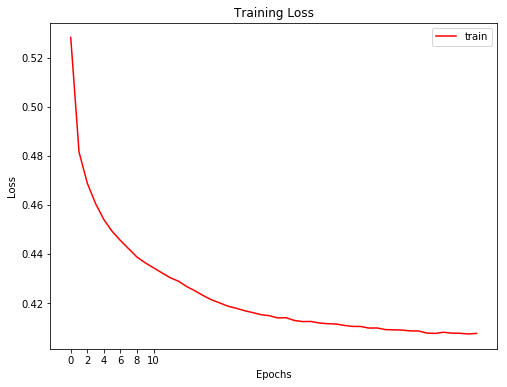

In [141]:
# visualize

model1 = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# accuracy
plt.figure(0)
plt.plot(model1.history['acc'],'r')
# plt.plot(model1.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend(['Train','Test'])
 
# loss     
plt.figure(1)
plt.plot(model1.history['loss'],'r')
# plt.plot(model1.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend(['train','test'])
 
plt.show()

Epochs increased substantially after 6 and kept growing till aroung 0.83, which is when it fluctuated mininally at that.

In [96]:
# predicting the testing set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [97]:
# creating the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1562   33]
 [ 297  108]]


In [98]:
# calculating the accuracy of the model
accuracy_ANN = (cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accuracy_ANN

0.835

#### Specificity:
Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified. Specificity relates to the test's ability to correctly reject customers who did not churn and actually didn't churn.

In [99]:
# specificity of the model
specificity_ANN =(cm[1,1]/(cm[1,1]+cm[0,1]))
specificity_ANN

0.7659574468085106

#### Sensitivity:
Sensitivity (also called the true positive rate) measures the proportion of actual positives that are correctly identified. Sensitivity refers to the test's ability to correctly detect people who are going to churn and actually do churn.

In [100]:
# sensitivity of the model
sensitivity_ANN =(cm[0,0]/(cm[0,0]+cm[1,0]))
sensitivity_ANN

0.8402366863905325

In [101]:
# loss function 
classifier.evaluate(X_test, y_pred, verbose=1)

2000/2000 [==============================] - 4s 2ms/step


[0.18488434934616088, 1.0]

#### _Model-2:_


In [142]:
# creating another model with different activation and second hidden layer 
classifier1 = Sequential()
classifier1.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh', input_dim = 11))
classifier1.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh'))
classifier1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [125]:
# fitting the model
classifier1.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
8000/8000 [==============================] - 18s 2ms/step - loss: 0.5186 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 6s 719us/step - loss: 0.4593 - acc: 0.8012
Epoch 3/100
8000/8000 [==============================] - 6s 715us/step - loss: 0.4418 - acc: 0.8090
Epoch 4/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4360 - acc: 0.810 - 6s 729us/step - loss: 0.4354 - acc: 0.8110
Epoch 5/100
8000/8000 [==============================] - 6s 737us/step - loss: 0.4332 - acc: 0.8109
Epoch 6/100
8000/8000 [==============================] - 5s 674us/step - loss: 0.4329 - acc: 0.8112
Epoch 7/100
8000/8000 [==============================] - 6s 712us/step - loss: 0.4322 - acc: 0.8115
Epoch 8/100
8000/8000 [==============================] - 6s 726us/step - loss: 0.4320 - acc: 0.8107
Epoch 9/100
8000/8000 [==============================] - 6s 778us/step - loss: 0.4318 - acc: 0.8114
Epoch 10/100
8000/8000 [==============================] - 7s 82

8000/8000 [==============================] - 6s 706us/step - loss: 0.3496 - acc: 0.8565
Epoch 82/100
8000/8000 [==============================] - 6s 705us/step - loss: 0.3485 - acc: 0.8552
Epoch 83/100
8000/8000 [==============================] - 6s 694us/step - loss: 0.3490 - acc: 0.8562
Epoch 84/100
8000/8000 [==============================] - 6s 690us/step - loss: 0.3487 - acc: 0.8585
Epoch 85/100
8000/8000 [==============================] - 6s 700us/step - loss: 0.3483 - acc: 0.8571
Epoch 86/100
8000/8000 [==============================] - 6s 692us/step - loss: 0.3491 - acc: 0.8586
Epoch 87/100
8000/8000 [==============================] - 6s 693us/step - loss: 0.3482 - acc: 0.8554 1s - loss:
Epoch 88/100
8000/8000 [==============================] - 6s 694us/step - loss: 0.3479 - acc: 0.8584
Epoch 89/100
8000/8000 [==============================] - 6s 696us/step - loss: 0.3498 - acc: 0.8575
Epoch 90/100
8000/8000 [==============================] - 6s 708us/step - loss: 0.3477 - acc:

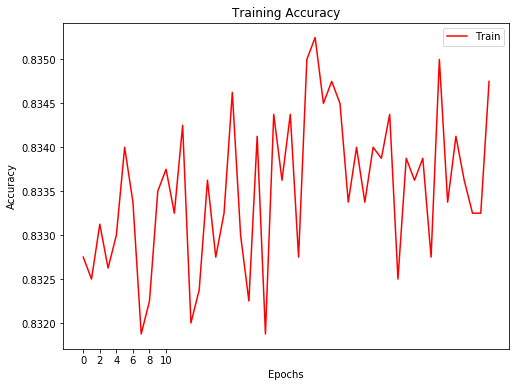

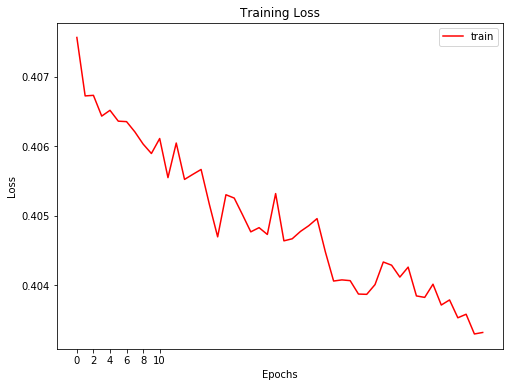

In [144]:
# visualize

model2 = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50)

# accuracy
plt.figure(0)
plt.plot(model2.history['acc'],'r')
# plt.plot(model1.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend(['Train','Test'])
 
# loss     
plt.figure(1)
plt.plot(model2.history['loss'],'r')
# plt.plot(model1.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend(['train','test'])
 
plt.show()

In [106]:
# predicting the target values using the model on testing data 
y_pred1 = classifier1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

In [107]:
# confusion matrix 
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[1511   84]
 [ 211  194]]


In [108]:
# accuracy of the model
accuracy_ANN1 = (cm1[0,0]+cm1[1,1])/ (cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
accuracy_ANN1

0.8525

In [109]:
# specificity of the model
specificity_ANN1 =(cm1[1,1]/(cm1[1,1]+cm1[0,1]))
specificity_ANN1

0.697841726618705

In [110]:
# sensitivity of the model
sensitivity_ANN1 =(cm1[0,0]/(cm1[0,0]+cm1[1,0]))
sensitivity_ANN1

0.8774680603948897

In [111]:
# loss function of the model 
classifier1.evaluate(X_test,y_pred1, verbose=1)

2000/2000 [==============================] - 3s 2ms/step


[0.1821128511428833, 1.0]

### Review (2):
The models have an accurate representation of the churn rate of bank customers.
- The model-1 we achieved 83.5% accuracy with renu activation, 1 hidden layer, and SGD optimizer of adam. It had specificity of 76.5%, sensitivity of 84.02%, and low loss function of 18%.
- The model-2 achieved higher accuracy with 2 hidden layers of tanh activation. Although it has better accuracy of 85.25%, it had specificity of 69.78% and sensitivity of 87.7% with low loss function of 18%. The graph nicely shows the high variation!

### Tuning:

Tuning the ANN, parameters learned during training (weights), stay fixed (hyperparamers - fixed, epochs, neurons)
parameter tuning best value of these hyperparameters, GridSearchCV with k-Fold Cross Validation

In [147]:
# k-Fold cross validator to check if the real relevant accuracy or the second one 
# ß and where we are in bias-variance tradeoffs
def build_classifier(optimzer):
    classifier = Sequential()  #Model 1 because of better results
    classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim = 11))  #input layer 
    classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))  #hidden layer 1
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))  #output layer 
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'nb_epoch': [100, 500],
              'optimzer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', 
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5610 - acc: 0.7969
Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5652 - acc: 0.7967
Epoch 1/1
7200/7200 [==============================] - 15s 2ms/step - loss: 0.5648 - acc: 0.7939
Epoch 1/1
7200/7200 [==============================] - 15s 2ms/step - loss: 0.5598 - acc: 0.7975
Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5655 - acc: 0.7910
Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5739 - acc: 0.7924
Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5779 - acc: 0.7937
Epoch 1/1
7200/7200 [==============================] - 16s 2ms/step - loss: 0.5653 - acc: 0.7950
Epoch 1/1
7200/7200 [==============================] - 17s 2ms/step - loss: 0.5624 - acc: 0.7957
Epoch 1/1
7200/7200 [==============================] - 17s 2ms/step - loss: 0.5953 - acc: 0.7936
Epoch 1/1
7200/7200 [=========

In [148]:
best_parameters

{'batch_size': 25, 'nb_epoch': 100, 'optimzer': 'adam'}

In [149]:
best_accuracy

0.796

### Conclusion:

The Model 1 has the best representation of the churn rate of bank customers as it achieved accuracy of 83.5%, compared to other Model with varying activation functions and number of hidden layers. It had specificity of 76.5%, sensitivity of 84.02% and loss of 18%. The Model 2 can provide most accurate classification to the bank for their customers at risk of churning. The parameters were checked by tuning using KerasClassifier and GridSearchCV, but the result were not better than Model 1.

From this data, the bank can analyse the customer's requirement and problems to cater the customers in a better manner and to avoid churn.